In [16]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [17]:
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:

IMAGE_SIZE = [400, 200]

train_path = "/content/drive/My Drive/Dataset/Train"
valid_path = "/content/drive/My Drive/Dataset/Test"

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False

folders = glob("/content/drive/My Drive/Dataset/Train/*")

##new layers
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,target_size = (400, 200),batch_size = 32,class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,target_size = (400, 200), batch_size = 32,   class_mode = 'categorical')


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 400, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 400, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 400, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 200, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 200, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 200, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 100, 50, 128)      0   

In [19]:
# fit the model
r = model.fit(training_set,validation_data=test_set,epochs=5,
              steps_per_epoch=len(training_set)
              ,validation_steps=len(test_set))

Epoch 1/5
27/27 [==============================] - 23s 825ms/step - loss: 1.9139 - accuracy: 0.6400 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 2/5
27/27 [==============================] - 22s 816ms/step - loss: 0.0329 - accuracy: 0.9965 - val_loss: 9.8098e-04 - val_accuracy: 1.0000
Epoch 3/5
27/27 [==============================] - 20s 756ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 4.7312e-04 - val_accuracy: 1.0000
Epoch 4/5
27/27 [==============================] - 22s 806ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 4.2528e-04 - val_accuracy: 1.0000
Epoch 5/5
27/27 [==============================] - 33s 1s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 4.2528e-04 - val_accuracy: 1.0000


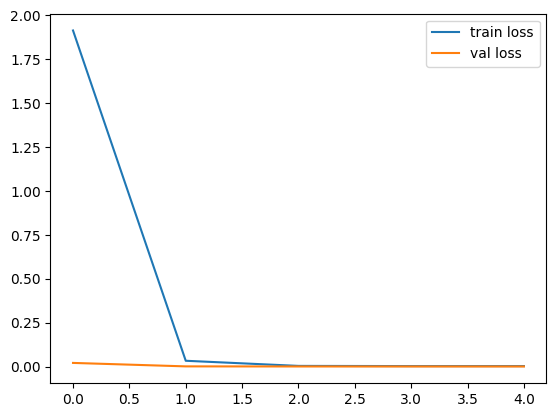

<Figure size 640x480 with 0 Axes>

In [20]:

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

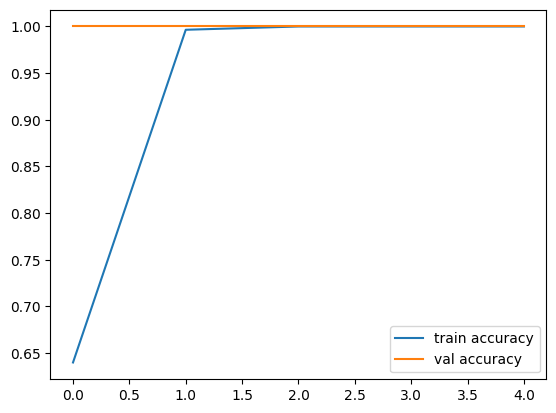

<Figure size 640x480 with 0 Axes>

In [22]:
# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

In [32]:
## SAVING
import tensorflow as tf
from keras.models import load_model
model.save('/content/drive/My Drive/VGG19.h5')